In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from  matplotlib import pyplot 

In [2]:
train = pd.read_csv('C:/Users/bal/Videos/Demand_Forecasting/Train/train.csv')
test = pd.read_csv('C:/Users/bal/Videos/Demand_Forecasting/test.csv')
meal = pd.read_csv('C:/Users/bal/Videos/Demand_Forecasting/Train/meal_info.csv')
center = pd.read_csv('C:/Users/bal/Videos/Demand_Forecasting/Train/fulfilment_center_info.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [4]:
train_meal = pd.merge(train,meal,on='meal_id',how='outer')
train_final = pd.merge(train_meal,center,on='center_id',how='outer')
train_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [5]:
test_meal = pd.merge(test,meal,on='meal_id',how='outer')
test_final = pd.merge(test_meal,center,on='center_id',how='outer')
test_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [6]:
cuisine_mapping = {'Thai': 1, 'Indian': 2, 'Italian': 3, 'Continental': 4}
train_final['cuisine'] = train_final['cuisine'].map(cuisine_mapping)
test_final['cuisine'] = test_final['cuisine'].map(cuisine_mapping)
category_mapping = {'Thai': 1, 'Indian': 2, 'Italian': 3, 'Continental': 4}
train_final['category'] = pd.factorize(train_final['category'])[0]
test_final['category'] = pd.factorize(test_final['category'])[0]
train_final['center_type'] = pd.factorize(train_final['center_type'])[0]
test_final['center_type'] = pd.factorize(test_final['center_type'])[0]
train_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,1,647,56,0,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,1,647,56,0,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,1,647,56,0,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,1,647,56,0,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,1,647,56,0,2.0


In [7]:
target = train_final['num_orders']
predictors = train_final[['checkout_price']]
print(predictors.head())

   checkout_price
0          136.83
1          135.83
2          132.92
3          135.86
4          146.50


In [8]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 42)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
y_pred = reg.predict(x_val)
error = mean_squared_error(y_pred,y_val)
error

137975.4759656722

ValueError: x and y must have same first dimension, but have shapes (356107, 1) and (100441,)

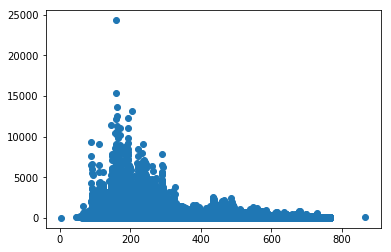

In [10]:
pyplot.scatter(x_train, y_train)
pyplot.plot(np.sort(x_train, axis=0),y_pred)
pyplot.show()